# Logistic Regression
## Loading of Data

pandas.iloc[] : 행 단위로 데이터 읽기  
    :(모든 행에서), :-1(맨뒤~1번째 열까지 모두 제외한 모든 열)  
    :(모든 행에서), -1(맨뒤 열부터 1번째 열만)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("ex2data1.txt", header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Plotting of Data

같은 y값끼리 분류한 매트릭스(array) 생성 : (y==?).reshape(?,?)  
scatter(s = 사이즈)

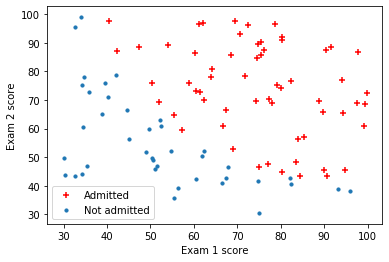

In [3]:
pos, neg = (y==1).reshape(100,1), (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted", "Not admitted"], loc=0)
plt.show()

## Sigmoid function

$g(z)=\frac{1}{(1+e^{-z})}$

numpy.exp(z) : 자연로그의 밑(무리수e)의 지수로 z를 삼은 값을 계산

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#testing
sigmoid(0)

0.5

## Compute the Cost Function and Gradient

$h_\theta(x)=g(x)=\frac{1}{(1+e^{-x})}$

$g(x)'=g(x)(1-g(x))$

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})))-(1-y^{(i)})log(1-(h_\theta(x^{(i)}))]$

$\frac{\Delta J(\theta)}{\Delta\theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$

X : (m, n)  
predictions, y, error : (m, 1)  
theta, grad : (n, 1)  
cost : (1, 1) single value

In [5]:
def costFunction(theta, X, y):
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0], grad

## Feature scaling

same as Linear Regression's

In [6]:
def featureNormalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm, mean, std

In [7]:
m, n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad = costFunction(initial_theta,X,y)
print("Cost of initial theta is", cost)
print("Gradient at initial theta (zeros):\n",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros):
 [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Gradient Descent

same as Linear Regression's

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [9]:
theta, J_history = gradientDescent(X,y,initial_theta,1,400)

In [10]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


## Plotting of Cost Function

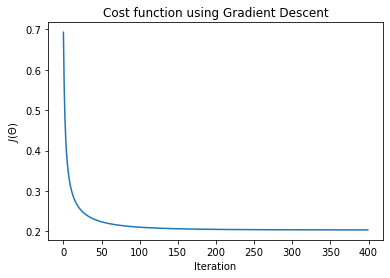

In [18]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## Plotting the decision boundary

$h_\theta(x)=g(z)$, 시그모이드 함수 $g(z)$에서 $z = \theta^Tx$

$h_\theta(x)\ge0.5$이면 클래스를 1로 예측, 즉 $\theta^Tx\ge0$인 경우에 클래스를 1로 예측한다

$\theta_1+\theta_2 x_2+\theta_3 x_3=0$ 이 선이 decision boundary

$x_3=\frac{-(\theta_1+\theta_2 x_2)}{\theta_3}$

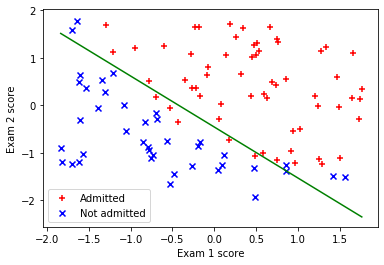

In [20]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()

## Prediction

predictions > 0 일때 true반환, 아니면 false반환  
precictions는 (m,1) array형태이므로 반환값 역시 true와 false가 들어간 (m,1) array형태

In [21]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


## Accuracy on training set

In [32]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
